In [1]:
import sys, os, git
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
sys.path.append(git_path)
from color_series1 import colors
from functions import complete_panel, save_figure, set_boundaries, add_subplotlabels, set_boundaries, prepare_figure, plot_xy
path_figures = "/examples/"

from plttools import PltTools
from utils import random_lin_generator, random_log_generator, multivariate_normal_distribution

In [3]:
x1, y1 = multivariate_normal_distribution(5, 4.5, s1 = [2.5, 3], s2= [4, 4], N = 200)
x2, y2 = random_lin_generator(xmin = 0, xmax = 10, slope = 0.45, alpha = 0.0, pref = 0)
x3, y3 = random_lin_generator(xmin = 2, xmax = 8, slope = 0.44, alpha = 0.012, pref = 0.6, N = 25)
x4, y4 = random_log_generator(xmin = -1, xmax = 2.5, slope = 0.41, alpha = 0.3, pref = 0.6, N = 20)
x5, y5 = random_log_generator(xmin = -1.1, xmax = 2.4, slope = 0.41, alpha = 0.3, pref = 0.9, N = 30)
x6, y6 = random_log_generator(xmin = -1.4, xmax = 2, slope = 0.41, alpha = 0.3, pref = 1, N = 30)

/home/simon/Git/Perso/pyplot-perso/utils.py:38: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  pts = np.random.multivariate_normal([meanx, meany], cov, size=N)


# Simple bi-panel example

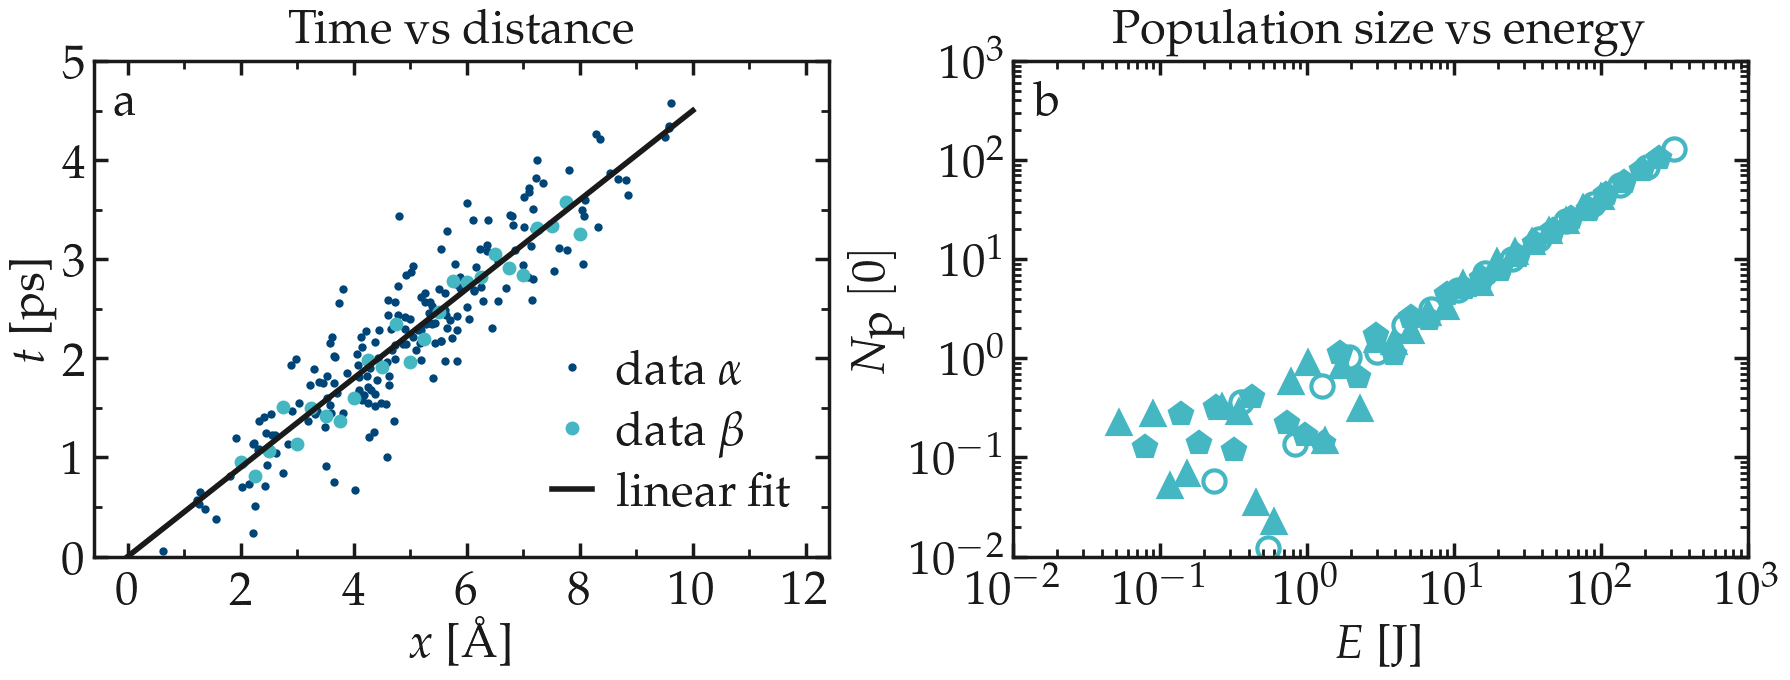

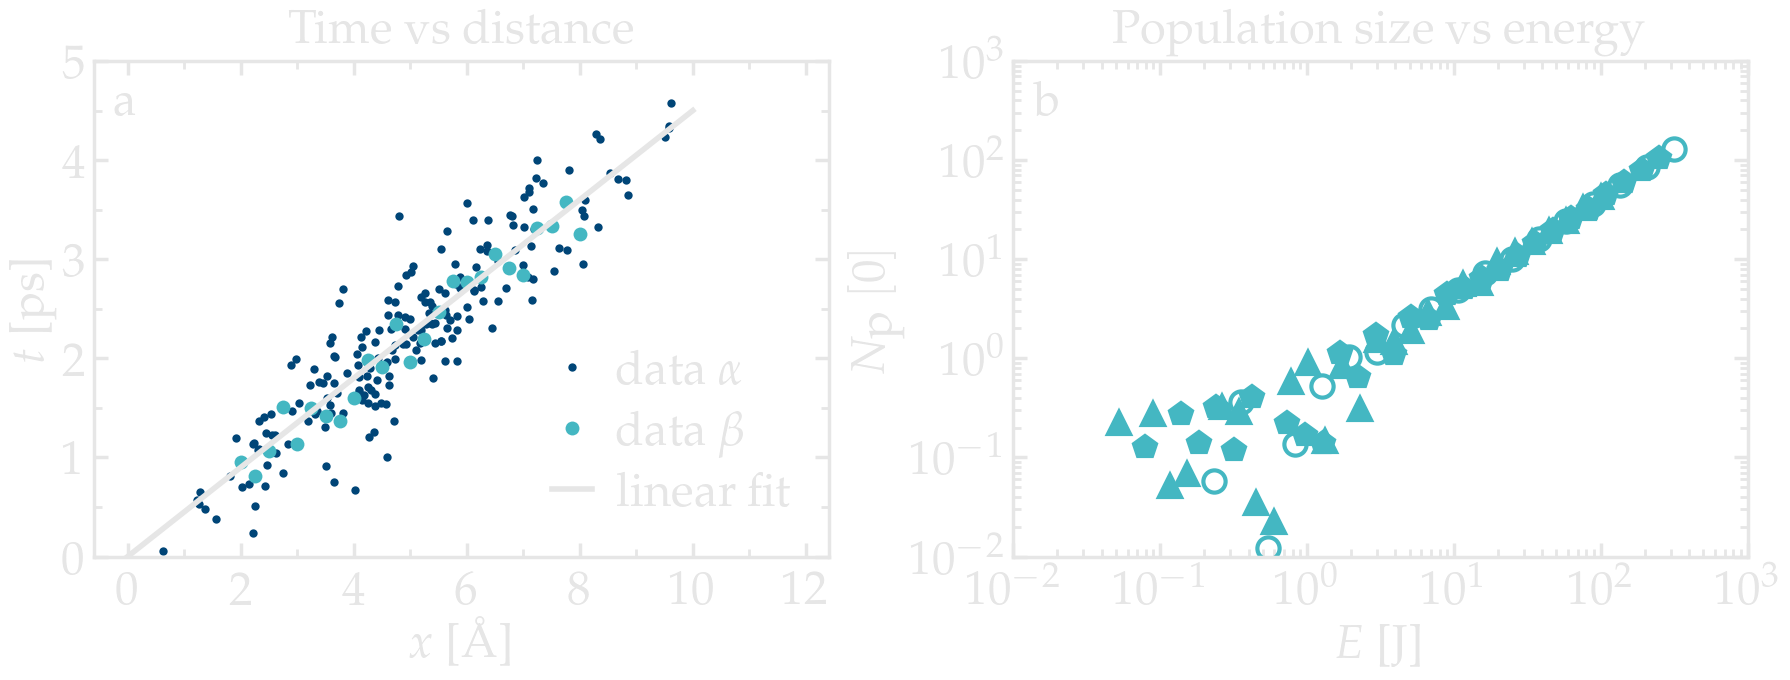

In [5]:

for dark_mode in [False, True]:

    # Initialise figure
    myplt = PltTools()
    myplt.prepare_figure(fig_size = (18,12), dark_mode = dark_mode,
                         transparency = True, n_colone = 2)
    # Panel 1
    myplt.add_panel(panel_position = [0, 0])
    myplt.add_plot(x = x1, y = y1/2, marker = "o", data_color = 2,
                   markersize = 6, data_label = r"$\textrm{data}~\alpha$")
    myplt.add_plot(x = x3, y = y3, marker = "o", data_color = 0, markersize = 10,
                   data_label = r"$\textrm{data}~\beta$")
    myplt.add_plot(x = x2, y = y2, marker = "-", data_color = "autogray",
                   data_label = r"$\textrm{linear fit}$")
    myplt.complete_panel(xlabel = r"$x ~ \textrm{[\AA{}]}$", ylabel = r"$t ~ \textrm{[ps]}$",
                         panel_title = r"$\textrm{Time vs distance}$", xpad = 10)
    myplt.set_boundaries(y_boundaries = (0, 5))
    # Panel 2
    myplt.add_panel(type = 'loglog', panel_position = [0, 1])
    myplt.add_plot(x = x4, y = y4, marker = "o", data_color = 0,
                   markersize = 16)
    myplt.add_plot(x = x5, y = y5, marker = "p", data_color = 0,
                   markersize = 16)
    myplt.add_plot(x = x6, y = y6, marker = "^", data_color = 0,
                   markersize = 16)
    myplt.complete_panel(xlabel = r"$E ~ \textrm{[J]}$", ylabel = r"$N_\textrm{p} ~ [0]$",
                         panel_title = r"$\textrm{Population size vs energy}$", xpad = 10)
    myplt.set_boundaries(x_boundaries = (0.01, 1000), y_boundaries = (0.01, 1000))
    # Finish figure
    myplt.add_subplotlabels(type_label_panel = "a")
    myplt.save_figure(filename = "bi-panel", saving_path = 'examples/', show = False)

In [5]:
saving_path = 'examples/'
print(saving_path[-1] == '/')

True


In [6]:
bar_width = 0.12
filename = "example-2"
desired_transparency = True
for mode, mygray in zip(['light', 'dark'], [colors["mylightgray"], colors["mydarkgray"]]):    

    gs = gridspec.GridSpec(2, 2)

    fig = prepare_figure(mode, transparency=desired_transparency,
                         desired_figsize=(18,12))

    ax = []
    ax.append(plt.subplot(gs[0, 0]))
    ax[-1].bar(x, data1, width=bar_width, color=colors["mycyan"])
    ax[-1].bar(x, data2, width=bar_width, color=colors["myorange"])
    complete_panel(ax[-1], r'$z$ (nm)', r'$N$', legend=False, axis_color=mygray, xpad=15)
    set_boundaries(plt, x_boundaries=(0.5, 7.5), y_boundaries=(0, 150),
                   x_ticks=np.arange(1, 7.1, 1), y_ticks=np.arange(0, 151, 50)) 
    
    ax.append(plt.subplot(gs[0, 1]))
    ax[-1].bar(x, data3, width=bar_width, color=mygray)
    ax[-1].bar(x, data4, width=bar_width, color=colors["mydarkblue"])
    complete_panel(ax[-1], r'$z$ (nm)', r'', legend=False, axis_color=mygray, xpad=15)
    set_boundaries(plt, x_boundaries=(39, 61), y_boundaries=(0, 300),
                   x_ticks=np.arange(40, 61, 5), y_ticks=np.arange(0, 301, 100)) 
    
    ax.append(plt.subplot(gs[1, :]))
    ax[-1].bar(x, data1, width=bar_width, color=colors["mycyan"],)
    ax[-1].bar(x, data2, width=bar_width, color=colors["myorange"])
    ax[-1].bar(x, data3, width=bar_width, color=mygray)
    ax[-1].bar(x, data4, width=bar_width, color=colors["mydarkblue"])
    complete_panel(ax[-1], r'$z$ (nm)', r'$N$', legend=False, axis_color=mygray, xpad=15)
    set_boundaries(plt, x_boundaries=(-1, 61), y_boundaries=(0, 300),
                   x_ticks=np.arange(0, 61, 10), y_ticks=np.arange(0, 301, 100)) 
    
    add_subplotlabels(fig, ax, ["a", "b", "c"], color=mygray)
    save_figure(plt, fig, mode, git_path, path_figures, filename,
                transparency = desired_transparency)

TypeError: prepare_figure() got an unexpected keyword argument 'desired_figsize'